In [176]:
# Esports Statistics from 1998-2024
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import matplotlib



In [177]:
data = pd.read_csv("HistoricalEsportData.csv")

# Konvertera vetenskaplig notation till decimal
pd.options.display.float_format = '{:,.0f}'.format

# Om du vill konvertera Earnings-kolumnen specifikt:
data["Earnings"] = data["Earnings"].astype(float)  # Säkerställ att det är float
data["Earnings"] = data["Earnings"].map('{:,.0f}'.format)


data["Earnings"] = pd.to_numeric(data["Earnings"], errors="coerce")
data["Players"] = pd.to_numeric(data["Players"], errors="coerce")
data["Tournaments"] = pd.to_numeric(data["Tournaments"], errors="coerce")

data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

data["Game_numerical"] = pd.factorize(data["Game"])[0]







In [178]:
ge_data = pd.read_csv("GeneralEsportData.csv")

ge_data["Genre_number"] = pd.factorize(ge_data["Genre"])[0]




In [179]:

data["Genre"] = data["Game"].map(ge_data.set_index("Game")["Genre"])

print(data)

data.to_csv("new_data.csv", index = False)


            Date                                Game  Earnings  Players  \
0     1998-01-01        Command & Conquer: Red Alert       NaN        8   
1     1998-01-01                          QuakeWorld       NaN        8   
2     1998-05-01                            Quake II       NaN        4   
3     1998-05-01                  Total Annihilation       NaN        2   
4     1998-05-01                          QuakeWorld       300        3   
...          ...                                 ...       ...      ...   
10234 2024-10-01       Super Street Fighter II Turbo       340        3   
10235 2024-10-01               Skullgirls 2nd Encore       330        3   
10236 2024-10-01       StarCraft: Evo Complete (Mod)       308        4   
10237 2024-10-01            Melty Blood: Type Lumina       280        3   
10238 2024-10-01  Power Rangers: Battle for the Grid       200        3   

       Tournaments  Game_numerical                 Genre  
0                1               0      

In [180]:
data.describe()




,Date,Earnings,Players,Tournaments,Game_numerical
count,10239,"2,245","10,239","10,239","10,239"
mean,2017-05-30 10:40:45.004395008,343,62,7,230
min,1998-01-01 00:00:00,0,0,1,0
25%,2014-06-01 00:00:00,120,6,1,113
50%,2018-10-01 00:00:00,289,17,2,208
75%,2021-07-01 00:00:00,521,53,6,337
max,2024-10-01 00:00:00,996,"2,134",172,620
std,NaN,267,136,12,157


In [181]:
data["Year"] = pd.to_datetime(data["Date"]).dt.year.astype(int)
summ_tournament = data.groupby("Year")["Tournaments"].describe()
print(summ_tournament)


      count  mean  std  min  25%  50%  75%  max
Year                                           
1998     10     1    0    1    1    1    1    2
1999     10     2    1    1    1    1    2    4
2000     34     2    1    1    1    1    2    8
2001     38     2    1    1    1    1    2    5
2002     52     2    1    1    1    1    2    8
2003     83     2    2    1    1    2    3   12
2004     94     3    3    1    1    1    4   12
2005    132     3    3    1    1    2    3   11
2006    147     3    3    1    1    2    4   17
2007    184     3    4    1    1    1    3   23
2008    189     3    3    1    1    2    4   15
2009    177     4    4    1    1    2    6   16
2010    234     4    7    1    1    2    5   59
2011    265     6   14    1    1    3    5   80
2012    332     6   12    1    1    2    5   80
2013    357     7    9    1    1    4    7   60
2014    429     7   11    1    1    3    7   75
2015    546    10   16    1    1    3   10   94
2016    558     9   16    1    1    2   

## reset_index återställer index

In [182]:
summ_money = data.groupby("Game")[["Earnings"]].sum().reset_index()
print(summ_money)

                         Game  Earnings
0                        ARMS     9,879
1    Acceleration of SUGURI 2       410
2                     After-H       586
3              Age of Empires    13,040
4           Age of Empires II    16,077
..                        ...       ...
616                 eFootball         0
617               iRacing.com     2,837
618                      osu!     6,070
619                   rFactor         0
620                 rFactor 2     1,490

[621 rows x 2 columns]


In [183]:
# vi kontrollerar om det finns null-värden
null_values = data.isnull().sum()

null_values

Date                 0
Game                 0
Earnings          7994
Players              0
Tournaments          0
Game_numerical       0
Genre                0
Year                 0
dtype: int64

(10.0, 1000.0)

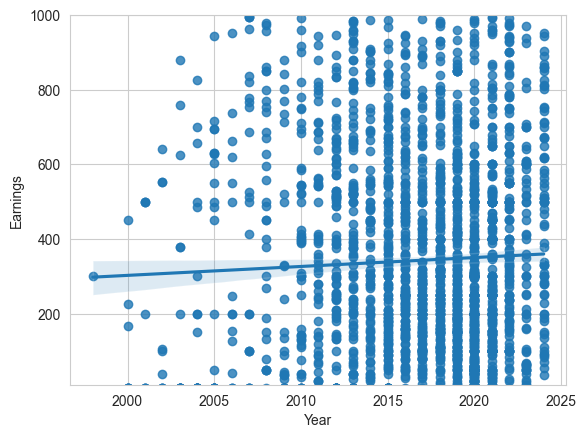

In [184]:
sns.set_style("whitegrid")
axes = sns.regplot(x=data.Year, y=data.Earnings)
axes.set_ylim(10, 1000)


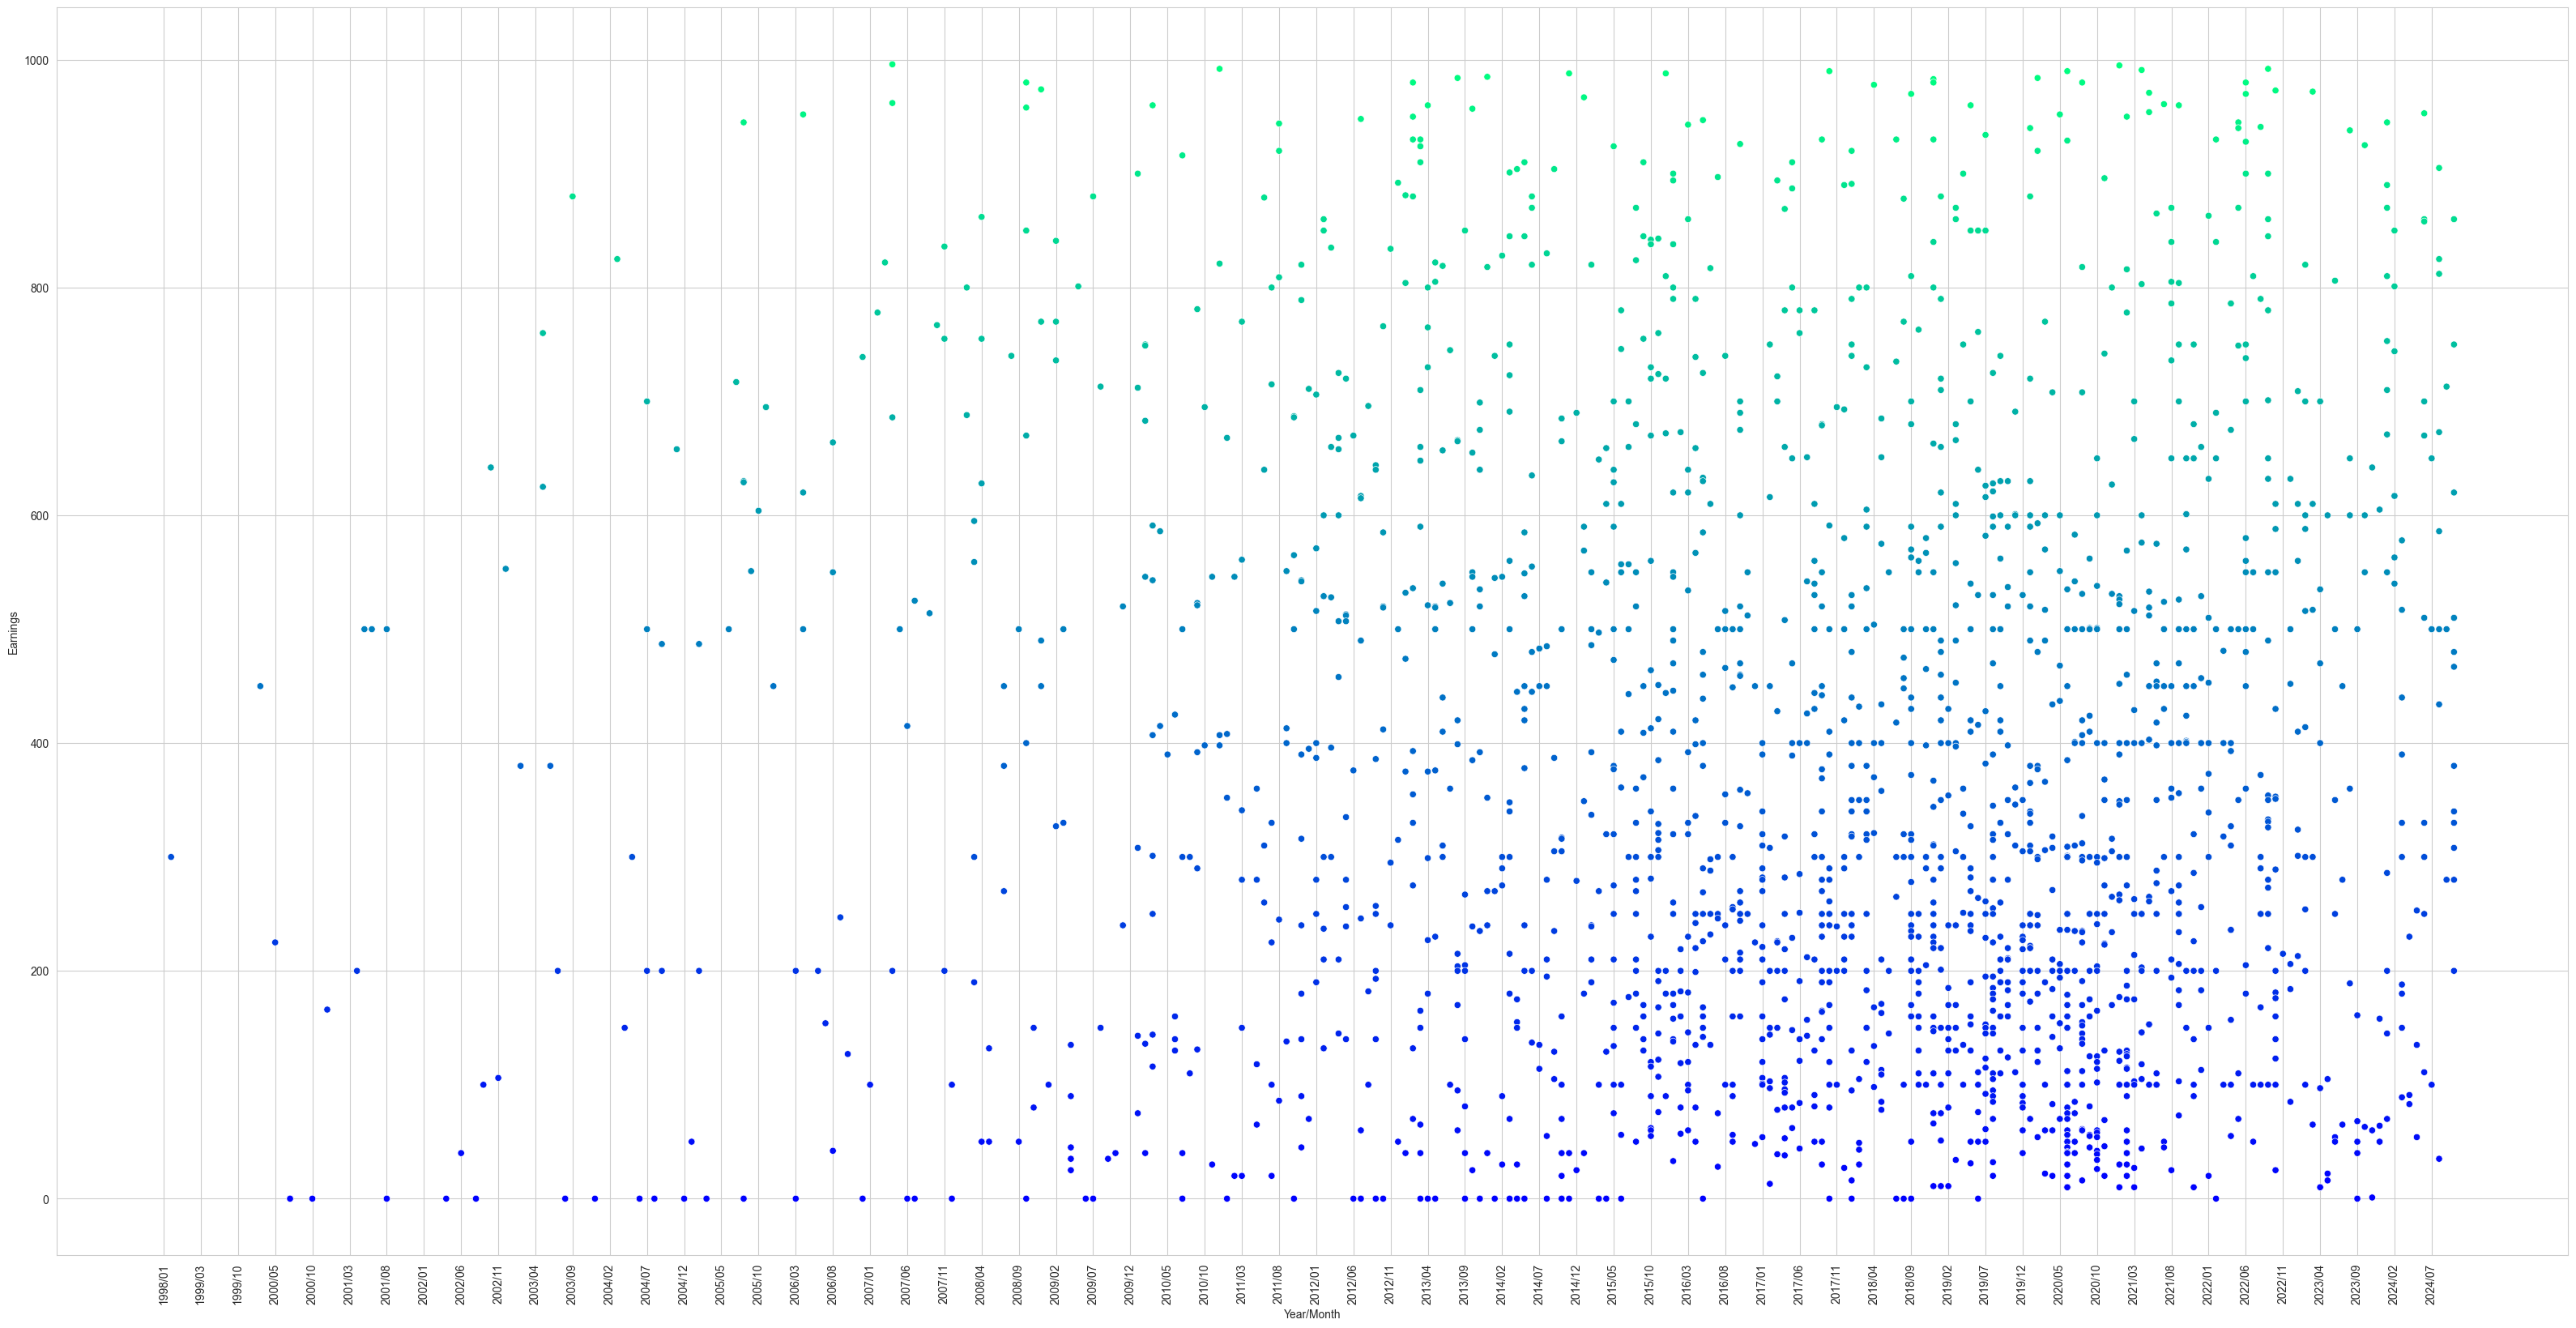

In [185]:
data["YearMonth"] = data["Date"].dt.strftime("%Y/%m")
plt.figure(figsize=(40, 20))
axes = sns.scatterplot(data=data, x="YearMonth", y="Earnings", hue="Earnings", palette = "winter", legend = False)
plt.xticks(plt.xticks()[0][::5], rotation=90);
y_min, y_max = axes.get_ylim()  # Hämta min/max för y-axeln
plt.xlabel("Year/Month");





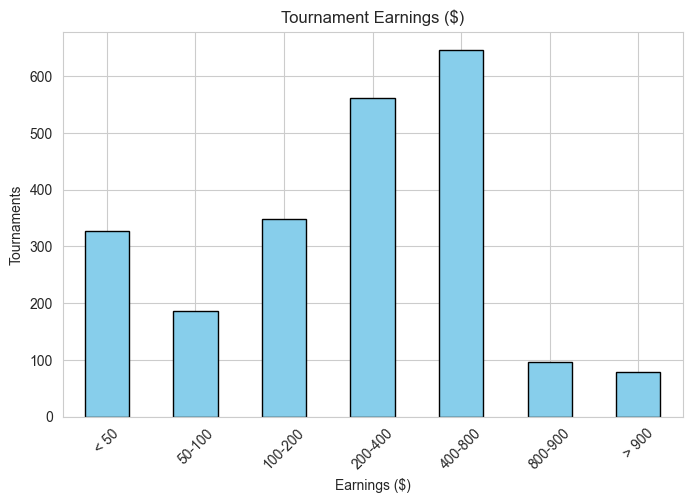

In [220]:

earnings_bins = [0, 50, 100, 200, 400, 800, 900, 50000000]
earnings_labels = ["< 50", "50-100", "100-200", "200-400", "400-800", "800-900", "> 900"]

# Segment earnings into defined bins
data["Earnings_Segment"] = pd.cut(data["Earnings"], bins=earnings_bins, labels=earnings_labels, include_lowest=True)

# Count occurrences in each segment
earnings_segment_counts = data["Earnings_Segment"].value_counts().sort_index()

# Plot segmented earnings distribution
fig, ax = plt.subplots(figsize=(8, 5))
earnings_segment_counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
ax.set_title("Tournament Earnings ($)")
ax.set_xlabel("Earnings ($)")
ax.set_ylabel("Tournaments")
plt.xticks(rotation=45)
plt.show()




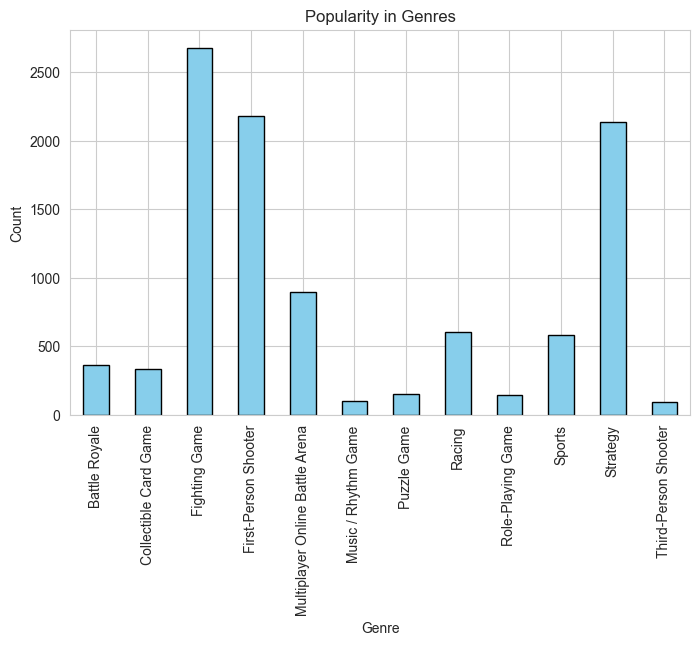

In [187]:

# Count occurrences in each segment
earnings_segment_counts = data["Genre"].value_counts().sort_index()

# Plot segmented earnings distribution
fig, ax = plt.subplots(figsize=(8, 5))
earnings_segment_counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
ax.set_title("Popularity in Genres")
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.xticks(rotation=90)
plt.show()


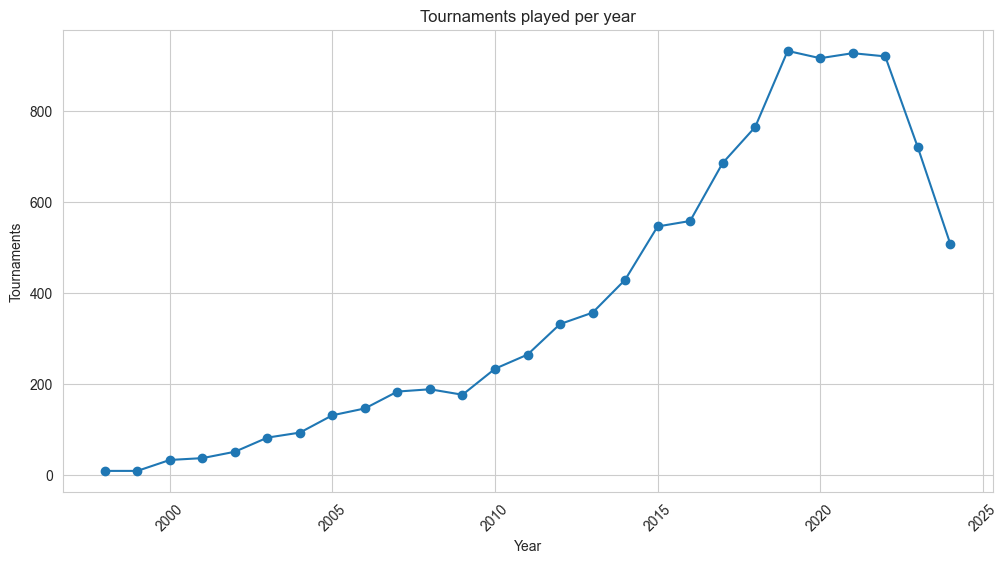

In [188]:
# Extrahera år
data["Year"] = pd.to_datetime(data["Date"]).dt.year

# Räkna antal turneringar per år
tournaments_per_year = data.groupby("Year").size()

# Plotta historiken
plt.figure(figsize=(12, 6))
plt.plot(tournaments_per_year.index, tournaments_per_year, marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Tournaments played per year")
plt.grid(True)
plt.show()


In [189]:
pivot = data.pivot_table(values="Earnings", index="Year", columns="Game", aggfunc="mean").fillna(0).round(2)
pivot

Game,ARMS,Acceleration of SUGURI 2,After-H,Age of Empires,Age of Empires II,Age of Empires III,Age of Empires IV,Age of Empires Online,Age of Mythology,Akatsuki Blitzkampf,...,Wolfenstein: Enemy Territory,World in Conflict,World of Tanks,World of Tanks Blitz,World of WarCraft,Xonotic,Yu-Gi-Oh! Duel Links,iRacing.com,osu!,rFactor 2
Year,,,,,,,,,,,,,,,,,,,,,
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000,0,0,0,0,280,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001,0,0,0,0,425,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002,0,0,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003,0,0,0,625,430,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004,0,0,0,0,536,0,0,0,175,0,...,0,0,0,0,0,0,0,0,0,0
2005,0,0,0,0,354,0,0,0,500,0,...,0,0,0,0,0,0,0,0,0,0
2006,0,0,0,144,177,500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,359,150,0,0,100,0,...,0,0,0,0,0,0,0,0,0,0


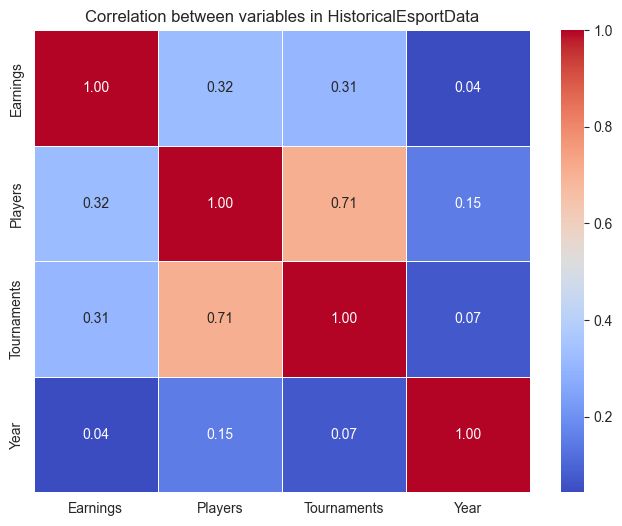

In [190]:

fixed_data = data.drop(columns=["Game_numerical"], errors = "ignore")
fixed_corr = fixed_data.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(fixed_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation between variables in HistoricalEsportData")
plt.show()


Players och Tournaments (0.71)

Hög positiv korrelation → Ju fler turneringar, desto fler spelare deltar.
Detta är logiskt eftersom fler tävlingar lockar fler deltagare.

Earnings och Players (0.37)

Medelhög korrelation → Fler spelare leder ibland till högre earnings, men det är inte en stark regel.
Vissa spel kan ha få spelare men höga prispengar, medan andra har många spelare men låg vinst.

Earnings och Tournaments (0.20)

Låg korrelation → Antalet turneringar har inte så stor inverkan på totala vinster.
Detta kan bero på att vissa turneringar har högre prispengar än andra.

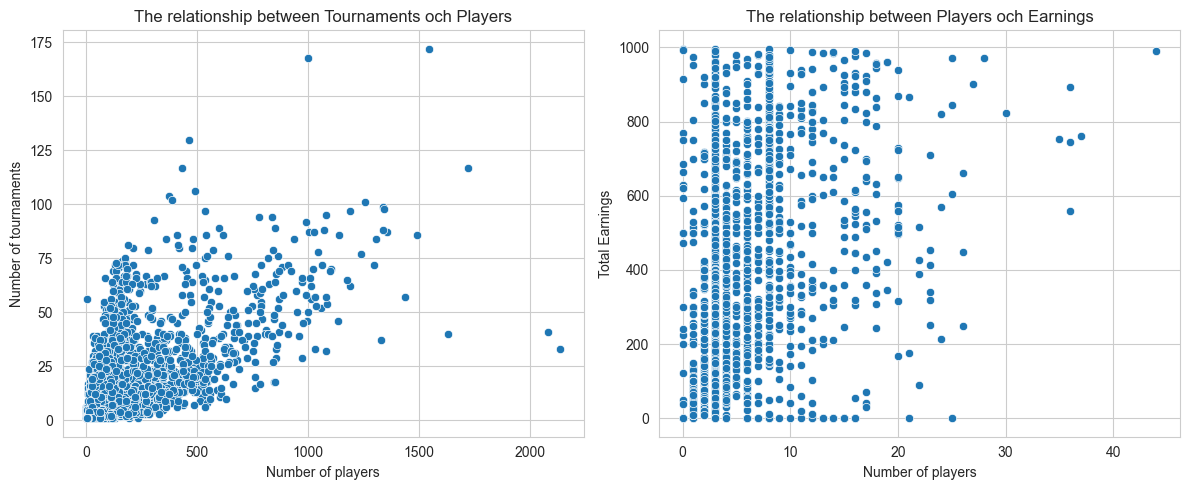

In [191]:
# Skapar scatter-plots för att visa relationerna mellan variablerna

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter-plot mellan Players och Tournaments (hög korrelation)
sns.scatterplot(y=data["Tournaments"], x=data["Players"], ax=axes[0])
axes[0].set_title("The relationship between Tournaments och Players")
axes[0].set_ylabel("Number of tournaments")
axes[0].set_xlabel("Number of players")

# Scatter-plot mellan Earnings och Players (lägre korrelation)
sns.scatterplot(x=data["Players"], y=data["Earnings"], ax=axes[1])
axes[1].set_title("The relationship between Players och Earnings")
axes[1].set_ylabel("Total Earnings")
axes[1].set_xlabel("Number of players")

plt.tight_layout()
plt.show()


Om vi ska förutsäga antal spelare → Vi kan använda antal turneringar eftersom det finns ett tydligt samband.

Om vi ska förutsäga earnings → Vi behöver fler variabler, eftersom det inte finns ett tydligt samband med varken spelare eller turneringar.

In [192]:
# Skapar en ny kolumn "Earnings per Tournament"
data["Earnings per Tournament"] = data["Earnings"] / data["Tournaments"]

# Ersätt NaN eller oändliga värden (om det finns turneringar med 0 värde)
data["Earnings per Tournament"] = data["Earnings per Tournament"].replace([float("inf"), -float("inf")], 0).fillna(0)

print(data["Earnings per Tournament"].describe())



count   10,239
mean        56
std        151
min          0
25%          0
50%          0
75%          0
max        996
Name: Earnings per Tournament, dtype: float64


Vi har tagit reda på pengar som delats ut i turneringar mellan åren 1998-2024 samt antalet spelare per turnering.

Vi har även tagit med:
korreleration mellan variablerna: spelare, år, turneringar och prispengar

Vi kan se vilka Genrer som har flest turneringar

Esport har blivit mer populärt med åren enligt vår data.

vi kan se hur många turneringar som spelats varje år



FRÅGA 12
vill man tjäna mest pengar ska man spela? *spelet* *vänt*

Vilket spel har haft flest turneringar genom tiderna? ???
Vilket spel har haft störst ökning i prispengar över tid? ???

Vilken genre har vuxit snabbast i antal turneringar? *intressant*

Vilket spel har flest turneringar men minst prispengar? ???

Kan vi förutse vilka spel/kategorier som kommer vara störst inom esport om 5 år? *intressant*


Vilken genre är populärast i Esport mellan åren?

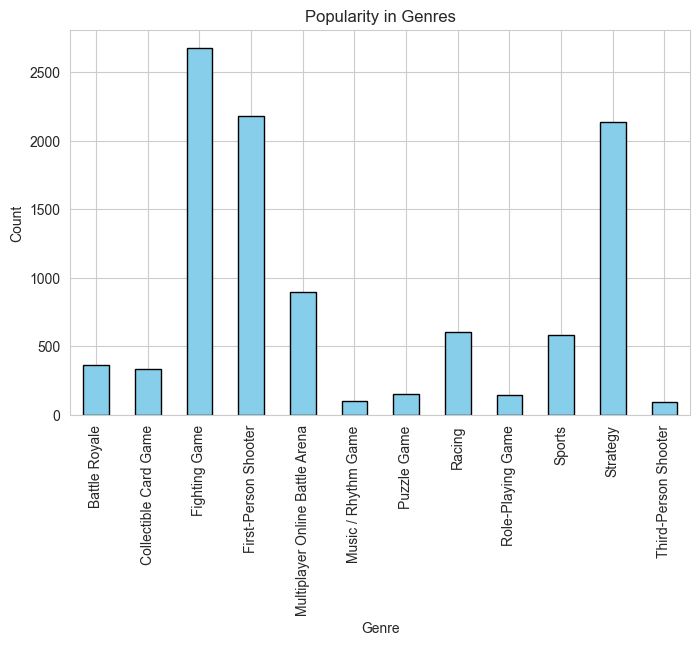

Vilket år hade flest turneringar?
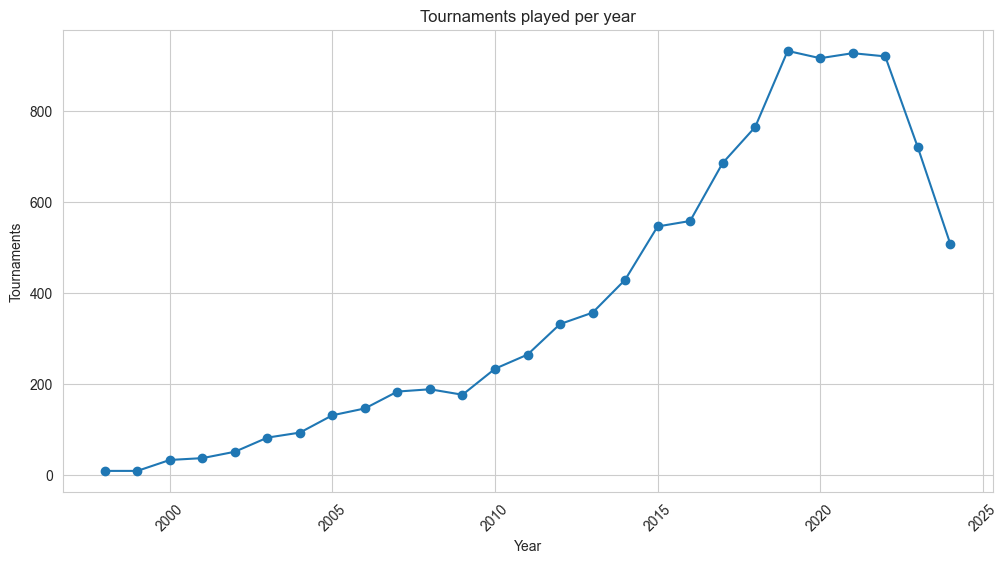

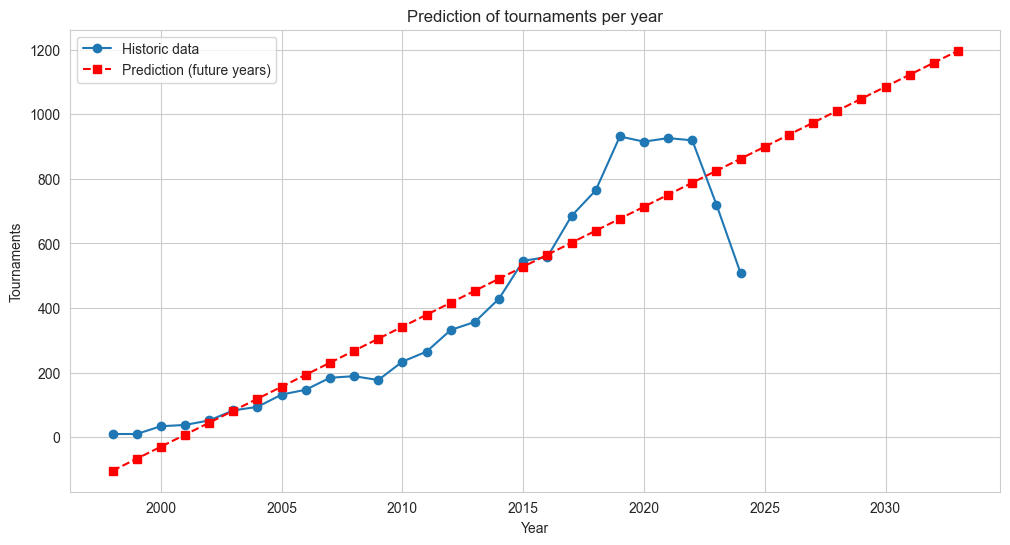

In [193]:
# Förbered data för regression
X = tournaments_per_year.index.values.reshape(-1, 1)  # År som input
y = tournaments_per_year.values  # Antal turneringar som output

# Skapa och träna modellen
model = LinearRegression()
model.fit(X, y)

# Prediktera framtida år
future_years = np.arange(X.min(), X.max() + 10).reshape(-1, 1)  # Prognos 10 år framåt
predictions = model.predict(future_years)

# Plotta historik och prognos
plt.figure(figsize=(12, 6))
plt.plot(tournaments_per_year.index, tournaments_per_year, marker="o", linestyle="-", label="Historic data")
plt.plot(future_years, predictions, marker="s", linestyle="--", label="Prediction (future years)", color="red")
plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Prediction of tournaments per year")
plt.legend()
plt.grid(True)




Ovanför förutspår vi in i framtiden för att se hur många turneringar som kan komma att arrangeras i framtiden. Vi gör detta med hjälp av att skapa en linjär reggression.

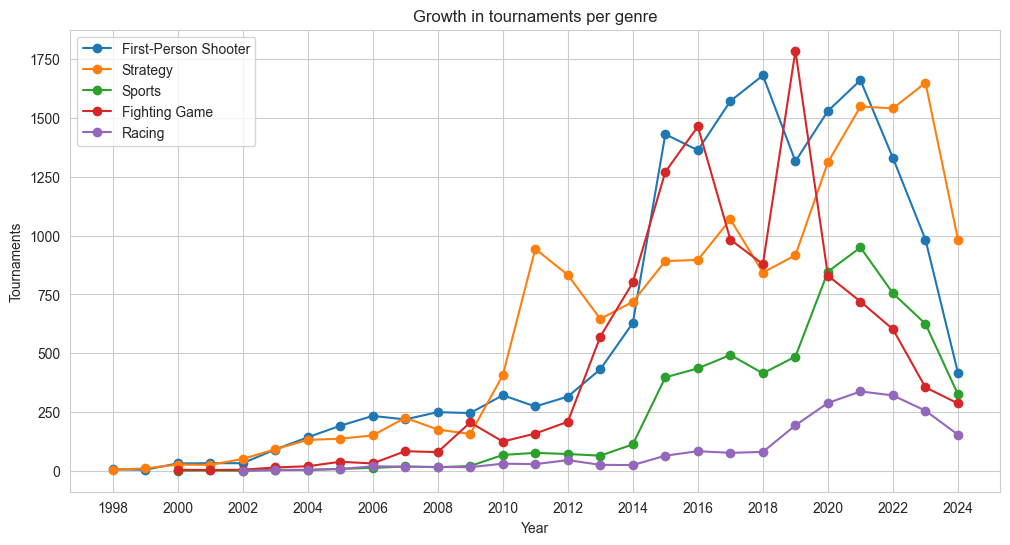

In [194]:
#Vilken genre har vuxit snabbast i antal turneringar? *intressant*
# Gruppera efter genre och år, summera antalet turneringar
growth = data.groupby(["Genre", "Year"])["Tournaments"].sum().reset_index()

# Beräkna Genomsnittlig årlig tillväxt
pivot_growth = growth.pivot(index="Year", columns="Genre", values="Tournaments").fillna(0)

#beräkning per genre
result = {}
years = pivot_growth.index

for genre in pivot_growth.columns:
    start_year = pivot_growth.loc[years.min(), genre]
    end_year = pivot_growth.loc[years.max(), genre]
    diff = years.max() - years.min()

    # CAGR = Compound Annual Growth Rate
    if start_year > 0 and diff > 0:
        cagr = ((end_year / start_year) ** (1 / diff)) - 1
        result[genre] = cagr

#Konvertera till DataFrame för visning
cagr_dataframe = pd.DataFrame(result.items(), columns=["Genre", "CAGR"]).sort_values(by="CAGR", ascending=False)

# Filtrera ut genrer med tillräcklig data för att göra en meningsfull visualisering
top_five_genres = growth["Genre"].value_counts().index[:5]

# Filtrera datasetet för att inkludera dessa genrer
filtered_growth = growth[growth["Genre"].isin(top_five_genres)]

# Skapa ett linjediagram för att visa tillväxten av turneringar per genre över tid
plt.figure(figsize=(12, 6))

for genre in top_five_genres:
    subset = filtered_growth[filtered_growth["Genre"]==genre]
    plt.plot(subset["Year"], subset["Tournaments"], marker="o", label=genre)

# Anpassa x-axeln för att visa fler sektioner (varannat år)
plt.xticks(np.arange(growth["Year"].min(), growth["Year"].max() + 1, 2))

plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Growth in tournaments per genre")
plt.legend()
plt.grid(True)


ovanför besvaras: Vilken genre som har vuxit snabbast i antal arrangerade turneringar.


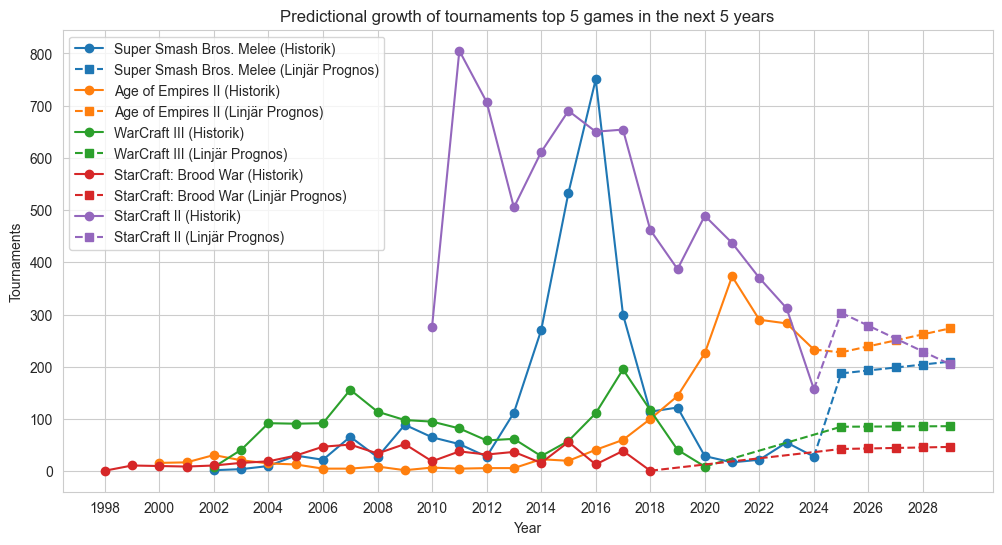

In [195]:
#Kan vi förutse vilka spel/kategorier som kommer vara störst inom esport om 5 år?

# Skapa en figur för att visualisera de 5 största spelen med linjär regression
plt.figure(figsize=(12, 6))

top_five_games = data["Game"].value_counts().index[:5]
upcoming_years = list(range(data["Year"].max() + 1, data["Year"].max() + 6))

predict_results = {}

# Definiera färger för varje spel
colors = matplotlib.colormaps.get_cmap("tab10")
color_map = {game: colors(i % 10) for i, game in enumerate(top_five_games)}

# Prognosera framtida tillväxt för de 5 mest populära spelen
for game in top_five_games:
    subset = data[data["Game"] == game].copy()
    subset["Year"] = pd.to_datetime(subset["Date"]).dt.year
    subset = subset.groupby("Year")["Tournaments"].sum().reset_index()

    # Om det finns för få datapunkter, hoppa över
    if len(subset) < 3:
        continue

    # Förbered data för linjär regression
    X = subset["Year"].values.reshape(-1, 1)
    y = subset["Tournaments"].values

    # Träna en linjär regressionsmodell
    model = LinearRegression()
    model.fit(X, y)

    # Gör en prognos för de kommande 5 åren
    x_prediction = np.array(upcoming_years).reshape(-1, 1)
    prediction = model.predict(x_prediction)

    # Spara prognosen
    predict_results[game] = prediction

  # Plotta historisk data
    plt.plot(subset["Year"], subset["Tournaments"], marker="o", linestyle="-", label=f"{game} (Historik)", color=color_map[game])

    # För att få en linje som går från sista datapunkten till första prediktiva punkt
    plt.plot([subset["Year"].iloc[-1], upcoming_years[0]], [subset["Tournaments"].iloc[-1], prediction[0]],
             linestyle="--", color=color_map[game])

    # Plotta prognosen med linjär regression
    plt.plot(upcoming_years, prediction, linestyle="--", marker="s", label=f"{game} (Linjär Prognos)", color=color_map[game])

    # Anpassa x-axeln för att inkludera framtida år
plt.xticks(np.arange(data["Year"].min(), max(upcoming_years) + 1, 2))


plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Predictional growth of tournaments top 5 games in the next 5 years")
plt.legend()
plt.grid(True)




Ovanför kan vi förutse vilka spel som kommer vara störst inom esport om 5 år